In [7]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from influxdb_client import InfluxDBClient
import warnings
from influxdb_client.client.warnings import MissingPivotFunction
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from datetime import datetime, timedelta
from dotenv import load_dotenv
from loguru import logger

data_path = os.path.abspath("C:\\Users\\tyjch\\PycharmProjects\\time-series\\src")
sys.path.append(data_path)

from data import DataframeManager

In [8]:
load_dotenv('../.env')

# Set up plotting style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("notebook", font_scale=1.2)

# Set Matplotlib parameters for better readability
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['font.size'] = 12

# Ignore InfluxDB warnings
warnings.simplefilter("ignore", MissingPivotFunction)

# Ignore debug logs from loguru
logger.remove()
logger.add('logfile.log', level='INFO')

1

In [16]:
manager = DataframeManager(time_range='1d')
df = manager.get_merged_dataframe()
df.head()

,core,room,cpu
_time,,,
2025-03-17 01:25:00+00:00,66.683281,85.557218,120.8984
2025-03-17 01:30:00+00:00,67.186539,85.759922,121.8668
2025-03-17 01:35:00+00:00,68.506279,85.922086,119.9300
2025-03-17 01:40:00+00:00,70.980594,86.296606,120.8984
2025-03-17 01:45:00+00:00,71.669827,86.676918,120.8984


# Figures

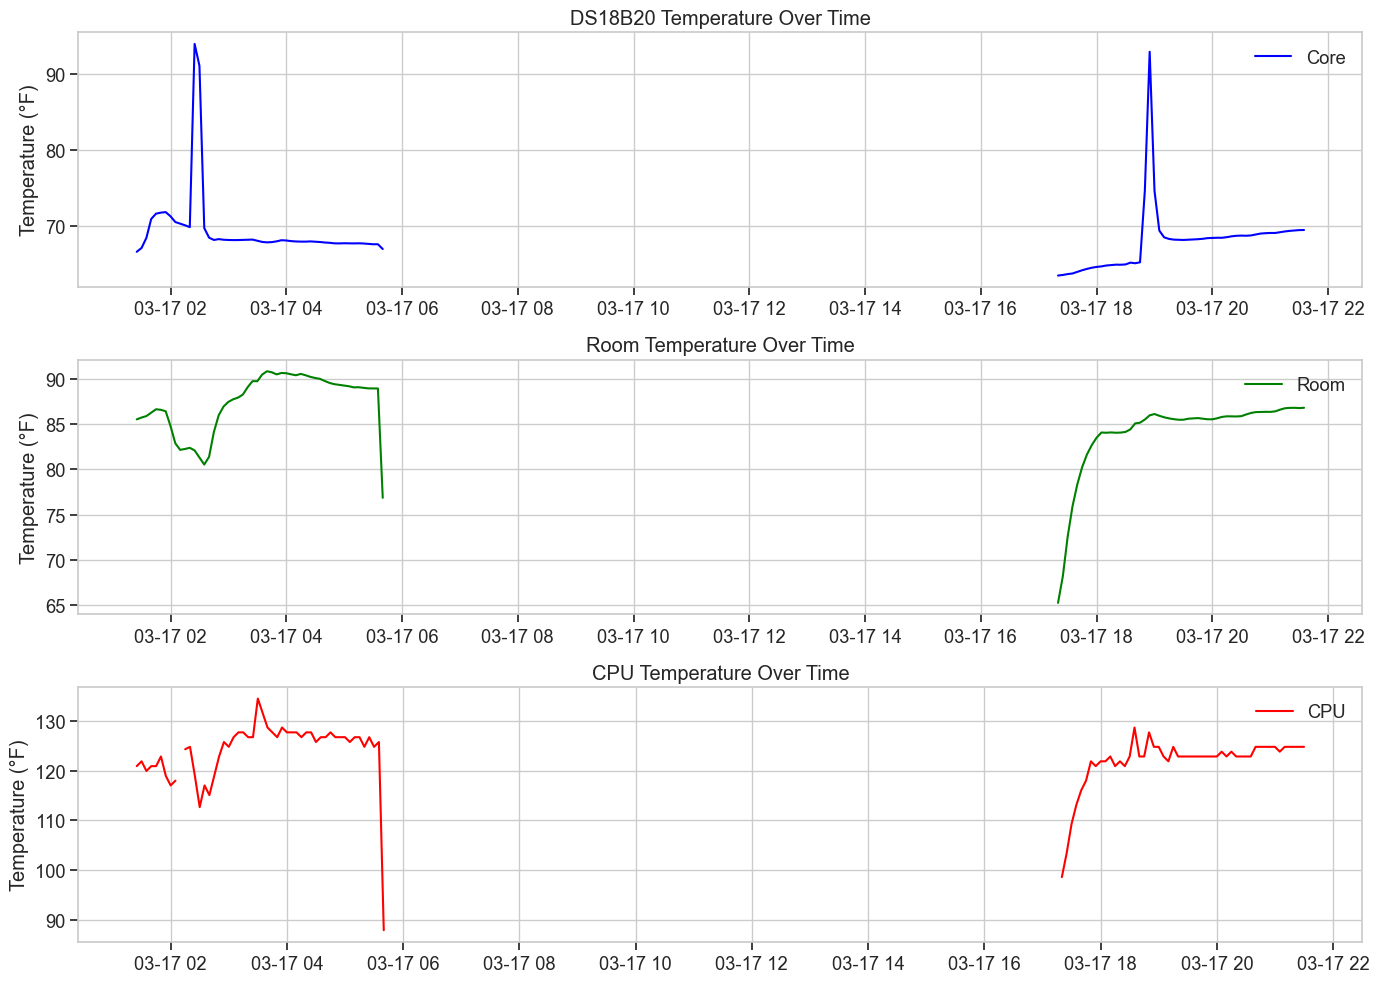

In [ ]:
plt.figure(figsize=(14, 10))

# Plot temperature data
plt.subplot(3, 1, 1)
plt.plot(df.index, df['core'], 'b-', label='Core')
plt.title('DS18B20 Temperature Over Time')
plt.ylabel('Temperature (°F)')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(df.index, df['room'], 'g-', label='Room')
plt.title('Room Temperature Over Time')
plt.ylabel('Temperature (°F)')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(df.index, df['cpu'], 'r-', label='CPU')
plt.title('CPU Temperature Over Time')
plt.ylabel('Temperature (°F)')
plt.legend()

plt.tight_layout()
# plt.savefig('001_temperature_time_series.png')
plt.show()

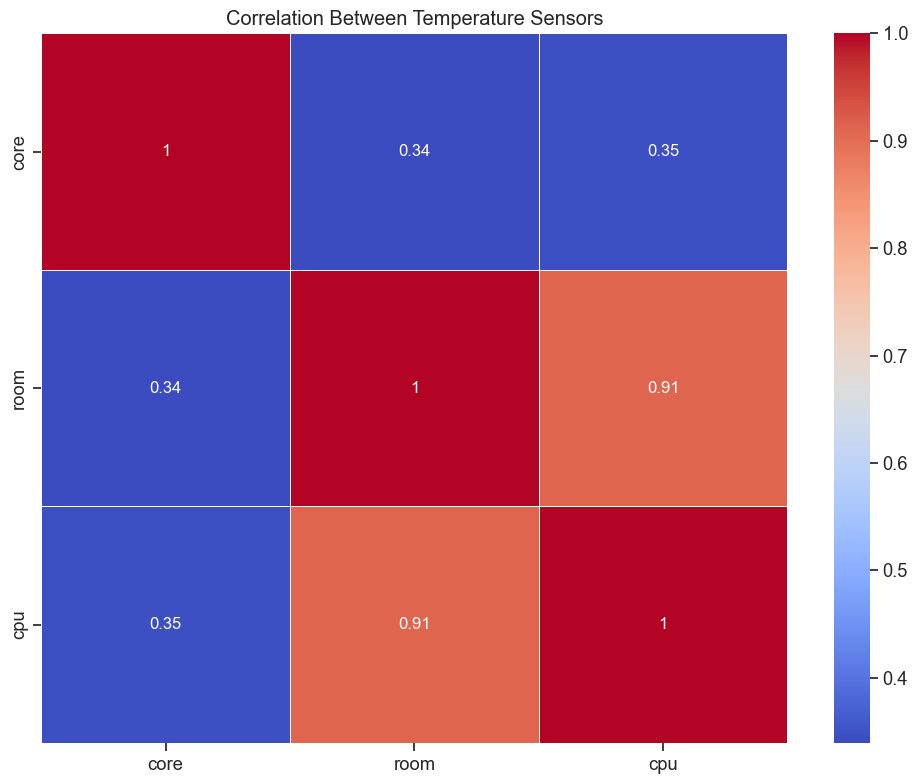

In [ ]:
correlation = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Between Temperature Sensors')
plt.tight_layout()
# plt.savefig('temperature_correlation.png')
plt.show()

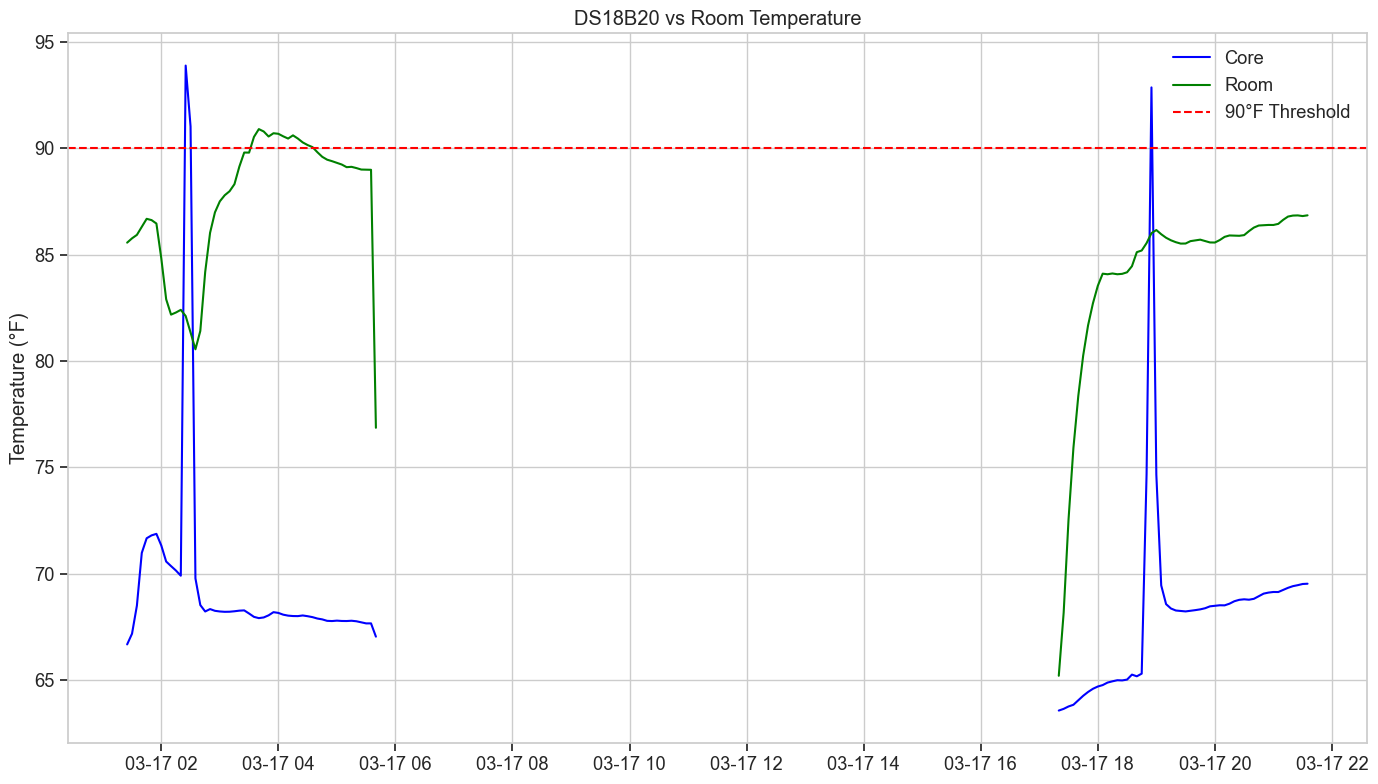

In [19]:
plt.figure(figsize=(14, 8))
plt.plot(df.index, df['core'], 'b-', label='Core')
plt.plot(df.index, df['room'], 'g-', label='Room')
plt.title('DS18B20 vs Room Temperature')
plt.ylabel('Temperature (°F)')
plt.legend()
plt.axhline(y=90, color='r', linestyle='--', label='90°F Threshold')
plt.legend()
plt.tight_layout()
# plt.savefig('ds18b20_vs_room.png')
plt.show()